## Value Iteration
#### Bellman Optimality Equation

In [1]:
# set state
import numpy as np
nCols = 3
nRows = 4
nWalls = 1
states = []
for i in range(nCols*nRows-nWalls):
    states.append(i)
N_STATES = len(states)
print(N_STATES)
print(states)

11
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [2]:
# set map
map = -np.ones((nCols+2,nRows+2))
for i in range(nCols):
    for j in range(nRows):
        map[i+1,j+1] = 0
map[2,2] = -1 # add wall
print(map)

[[-1. -1. -1. -1. -1. -1.]
 [-1.  0.  0.  0.  0. -1.]
 [-1.  0. -1.  0.  0. -1.]
 [-1.  0.  0.  0.  0. -1.]
 [-1. -1. -1. -1. -1. -1.]]


In [4]:
# set action
actions = [0, 1, 2, 3]
N_ACTIONS = len(actions)

In [5]:
# states -> location
locations = []
index = 0
for i in range(nCols):
    for j in range(nRows):
        if map[i+1,j+1]==0:
            locations.append((i+1,j+1))
            index = index + 1
print(locations) # match index with states
# action -> move
move = [(0,-1),(-1,0),(0,1),(1,0)] # match index with actions
print(move)

[(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4)]
[(0, -1), (-1, 0), (0, 1), (1, 0)]


In [6]:
# set transition probability
P = np.zeros((N_STATES,N_ACTIONS,N_STATES)) # P[S,A,S']
for s in range(N_STATES):
    for a in range(N_ACTIONS):
        current_location = locations[s]
        # heading collectly  ####################################################################################
        next_location = (current_location[0] + move[a][0],current_location[1] + move[a][1])
        
        if map[next_location[0],next_location[1]] == -1: # there is barrier or wall
            next_location = current_location
            next_s = states[locations.index(next_location)]
        else:
            next_s = states[locations.index(next_location)]
        P[s,a,next_s] = P[s,a,next_s] + 0.8
        # left error ############################################################################################
        next_location = (current_location[0] + move[a-1][0],current_location[1] + move[a-1][1])
        if map[next_location[0],next_location[1]] == -1: # there is barrier or wall
            next_location = current_location
            next_s = states[locations.index(next_location)]
        else:
            next_s = states[locations.index(next_location)]
        P[s,a,next_s] = P[s,a,next_s] + 0.1
        # right error ############################################################################################
        next_location = (current_location[0] + move[(a+1)%4][0],current_location[1] + move[(a+1)%4][1])
        
        if map[next_location[0],next_location[1]] == -1: # there is barrier or wall
            next_location = current_location
            next_s = states[locations.index(next_location)]
        else:
            next_s = states[locations.index(next_location)]
        P[s,a,next_s] = P[s,a,next_s] + 0.1

In [7]:
# rewards s,a ---  R(s,a)  ---> s'
if True:
    R = -0.02*np.ones((N_STATES,N_ACTIONS))
else:
    R = -0.5*np.ones((N_STATES,N_ACTIONS))
R[3,:] = 1
R[6,:] = -1
print(R)
# discount factor
gamma = 0.99

[[-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [ 1.    1.    1.    1.  ]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [-1.   -1.   -1.   -1.  ]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]]


In [8]:
# policy : given state which action would u choose
# assume that we know the policy
bad_policy = np.zeros((N_STATES,N_ACTIONS))
bad_policy[0,2] = 1
bad_policy[1,2] = 1
bad_policy[2,2] = 1
bad_policy[3,2] = 1
bad_policy[4,3] = 1
bad_policy[5,2] = 1
bad_policy[6,2] = 1
bad_policy[7,2] = 1
bad_policy[8,2] = 1
bad_policy[9,2] = 1
bad_policy[10,1] = 1

In [9]:
random_policy = 0.25*np.ones((N_STATES,N_ACTIONS))

In [64]:
optimal_policy = np.zeros((N_STATES,N_ACTIONS))
optimal_policy[0,2] = 1
optimal_policy[1,2] = 1
optimal_policy[2,2] = 1
optimal_policy[3,2] = 1
optimal_policy[4,1] = 1
optimal_policy[5,1] = 1
optimal_policy[6,1] = 1
optimal_policy[7,1] = 1
optimal_policy[8,0] = 1
optimal_policy[9,0] = 1
optimal_policy[10,0] = 1
print(optimal_policy)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [11]:
optimalWithNoise_policy = np.zeros((N_STATES,N_ACTIONS))
ep = 0.1
optimalWithNoise_policy[0,2] = 1
optimalWithNoise_policy[1,2] = 1
optimalWithNoise_policy[2,2] = 1
optimalWithNoise_policy[3,2] = 1
optimalWithNoise_policy[4,1] = 1
optimalWithNoise_policy[5,1] = 1
optimalWithNoise_policy[6,1] = 1
optimalWithNoise_policy[7,1] = 1
optimalWithNoise_policy[8,0] = 1
optimalWithNoise_policy[9,0] = 1
optimalWithNoise_policy[10,0] = 1
optimalWithNoise_policy = optimalWithNoise_policy + (ep/4)*np.ones((N_STATES,N_ACTIONS))
optimalWithNoise_policy = optimalWithNoise_policy / np.sum(optimalWithNoise_policy,axis = 1).reshape((N_STATES,1))

## State value iteration with bellman optimality eqn
#### optimal state value algorithm
1. initialize with all zero
1. for every state s v * (s) = max for a [R(s,a) + gamma * sum for s1(P(s,a,s1)*v * (s1)]
1. using computed v * ,Fine optimal policy by solving
    * optimal policy = argmax.a(q * (s,a))
    * where q * (s,a) = R(s,a) + gamma * sum for s1 (P*v * (s1))


In [71]:
Vstar = np.zeros((N_STATES))
Vstar[3] = 1
Vstar[6] = -1

num_iterations = 100
historyVstar = np.zeros((num_iterations+1,N_STATES))
historyVstar[:,3] = 1
historyVstar[:,6] = -1
# get optimal state value function
for _ in range(num_iterations):
    for s in range(N_STATES):
        if (s!=3) and (s!=6):
            Vstar[s] = max([R[s,a] + gamma*\
                            sum([P[s,a,s1]*Vstar[s1] \
                                 for s1 in range(N_STATES)])\
                                        for a in range(N_ACTIONS)])

    historyVstar[_+1:]=Vstar
    
# get optimal policy from optimal state value function
Qstar = np.zeros((N_STATES,N_ACTIONS))
Qstar[3,:] = 1
Qstar[6,:] = -1
for s in range(N_STATES):
        if (s!=3) and (s!=6):
            for a in range(N_ACTIONS):
                Qstar[s,a] = R[s,a] + gamma*sum([P[s,a,s1]*Vstar[s1] for s1 in range(N_STATES)])

print(Vstar)
print(Qstar)
optimalPolicyFromV = np.argmax(Qstar,axis=1)

print(optimalPolicyFromV)

[ 0.85530117  0.89580324  0.93236641  1.          0.81969892  0.68749634
 -1.          0.78026128  0.74559468  0.70873821  0.49092193]
[[ 0.82322354  0.83075787  0.85530117  0.80256088]
 [ 0.83476757  0.86645526  0.89580324  0.86645526]
 [ 0.84984258  0.90611872  0.93236641  0.71218162]
 [ 1.          1.          1.          1.        ]
 [ 0.79112222  0.81969892  0.79112222  0.76026732]
 [ 0.68696646  0.68749634 -0.64953064  0.5103828 ]
 [-1.         -1.         -1.         -1.        ]
 [ 0.75636299  0.78026128  0.72890705  0.74902668]
 [ 0.74559468  0.71792194  0.68894841  0.71792194]
 [ 0.70873821  0.64691224  0.50703739  0.66373581]
 [ 0.49092193 -0.69323365  0.31841144  0.48757652]]
[2 2 2 0 1 1 0 1 0 0 0]


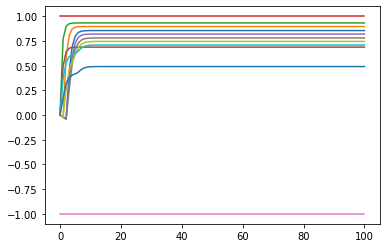

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(historyVstar)
plt.show()

## State value iteration with bellman optimality eqn
#### optimal action value algorithm
1. initialize with all zero
1. for every state s,a
    * q * (s,a) = [R(s,a) + gamma * sum for s1(P(s,a,s1)*max(q * (s1,a1))]
1. Fine optimal policy by solving
    * optimal policy = argmax.a(q * (s,a))



In [68]:
Q_star = np.zeros((N_STATES,N_ACTIONS))
Q_star[3,:] = 1.
Q_star[6, : ] = -1.
for _ in range(num_iterations):
    for s in range(N_STATES):
        if (s!=3) and (s!=6):
            for a in range(N_ACTIONS):
                Q_star[s,a] = R[s,a] + gamma * \
                            sum([ P[s,a,s1] * \
                                max([Q_star[s1,a1] for a1 in range(N_ACTIONS)])\
                                for s1 in range(N_STATES)])
    
#print(Q_star)
#print()
optimalPolicyFromQ = np.argmax(Q_star,axis=1)
print("Opimtal Policy from Q")
print(np.eye(4)[optimalPolicyFromQ])
print()
print("Opimtal Policy from V")
print(np.eye(4)[optimalPolicyFromV])
print()
print("Optimal Policy from previous code(deterministic)")
print(optimal_policy)


Opimtal Policy from Q
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

Opimtal Policy from V
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

Optimal Policy from previous code(deterministic)
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
